In [17]:
%matplotlib notebook
# %matplotlib inline

from IPython.display import display, HTML

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

## The (College Student) Diet Problem

Consider the canonical college student. After a hard afternoon's work of solving way too many partial differential equations, she emerges from her room to obtain sustenance for the day.

She has a choice between getting chicken over rice (\$5) from the halal cart on her street ($r$), or subs (\$7) from the deli ($s$). She's a poor college student, so she will obviously want to get her money's worth. This is obviously an optimisation problem: she wants to find the amount of chicken over rice and subs she has to buy in order to minimise the total cost she spends on food.

$$
\text{minimise} \quad 5r + 7s
$$

In optimisation, we like to call this expression the **objective function**.

Well, it's not as simple as that. A girl's got to get her fill of daily nutrients. Fibre, protein, and carbohydrates are all important, and however far away food pyramids are from the quotidien thoughts of college students, a girl can still dream of a pseudo-healthy diet with at least 4 servings of fibre, 3 servings of protein, and 6 servings of carbohydrates.

A chicken over rice has 2 servings of fibre, 3 servings of protein, and 3 servings of carbohydrates, while a sub has 1 serving of fibre, 3 servings of protein, and 4 servings of carbohydrates. To find the combination of meals that satisfies the daily nutritional requirements, we impose the following **constraints**:

\begin{align}
\text{Fibre: } &2r +  s \geq 4 \\
\text{Protein: } &3r + 3s \geq 3 \\
\text{Carbohydrates: } &3r + 4s \geq 6
\end{align}

### Visualising the Problem

<IPython.core.display.Javascript object>


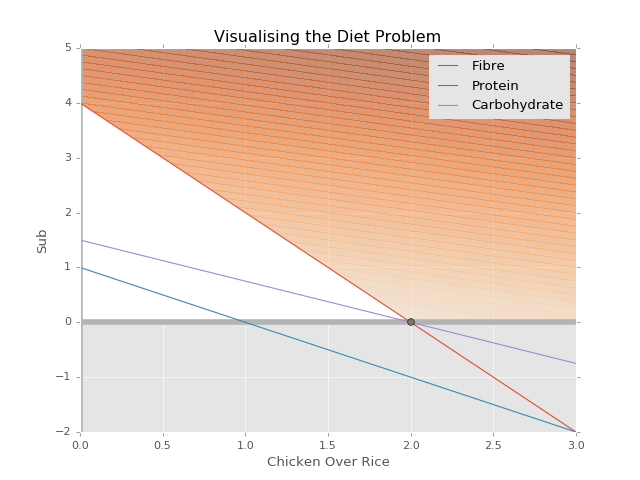

In [18]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# define view
r_min = 0.0
r_max = 3.0
s_min = 0.0
s_max = 5.0
res = 50

r = numpy.linspace(r_min, r_max, res)

# plot axes
axes.axhline(0, color='#B3B3B3', linewidth=5)
axes.axvline(0, color='#B3B3B3', linewidth=5)

# plot constraints
c_1 = lambda x: 4 - 2*x
c_2 = lambda x: 1 - x
c_3 = lambda x: 0.25 * ( 6 - 3*x )
c_1_line = axes.plot( r, c_1(r), label='Fibre' ) # 2r +  s \geq 4
c_2_line = axes.plot( r, c_2(r), label='Protein' ) # 3r + 3s \geq 3
c_3_line = axes.plot( r, c_3(r), label='Carbohydrate' ) # 3r + 4s \geq 6

# plot objective
s = numpy.linspace(s_min, s_max, res)
c = numpy.empty([r.size, s.size])
for i, r_i in enumerate(r):
    c[:,i] = 5 * r_i + 12 * s

axes.contourf(r, s, c, res, cmap='Oranges', alpha=0.5)
r_cut = numpy.linspace(0.0, 2.0, 100)
axes.fill_between(r_cut, c_1(r_cut), color='w')

# plot cost minimising point
axes.plot(2.0, 0, 'o')

# label graph
axes.set_title('Visualising the Diet Problem')
axes.set_xlabel('Chicken Over Rice')
axes.set_ylabel('Sub')
axes.legend()

plt.show()

We can visualise our diet problem on a graph of "Number of Subs vs. Number of Chicken or Rice", where lines each represent a constraint, and our cost function can be represented in shades of blue: the deeper the blue, the more we will spend on meals.

The regions where we will satisfy our constraints will be the regions _above_ our constraint lines, since we want more than or equal to the number of minimum servings. Obviously, we can't buy a negative number of subs or chicken over rice, so we have the implicit constraints that $r>0$ and $s>0$.

The intersection of all the regions that satisfy each of our constraints is what we call the **feasible region**, or the **feasible set**, the region where solutions that satisfy all constraints. In the graph, this is the region with the blue gradient fill.

So our problem of deciding how much of what food to buy has been essentially reduced to finding the point in the feasible set with the minimum cost (i.e. the lightest shade of blue.) With one glance, we can tell that this point is $(0, 2)$, so we should buy 2 chicken over rice, and 0 subs. Interestingly, our feasible region is determined largely by the fibre constraint—read from this what you want.

Well, you think to yourself, that was easy; I can stop reading now!

That's true, if you only have 2 foods to choose between. But in general, life isn't as simple as this; if, say, you're a functioning adult and actually cook, you'll want to choose between the 1000's of grocery items available to you at the local supermarket. In that case, you'll have to draw out one axis for each food item (how you'll do that, I don't know), and then compare the colors across this unvisualisable space. This shit gets real, and fast.

## Linear Programming

Well, luckily for us, a clever guy by the name of **George Dantzig** managed to solve exactly this type of problem for us while he was working for the U.S. Air Force in WWII, when computers were just starting to come out of the realm of science fiction. They faced a similar problem then, as many do now: they only had a set amount of men and resources, and wanted to maximise the amount of work they could do in winning the war.



In other areas, you could also imagine say, a furniture manufacturer wanting to find the most efficient way of using the manpower and planks, screws, tools, and whatever they use to build furniture these days, to produce the combination of furniture that will maximise their profits. Or, on Wall Street, a trader wanting to find the best combination of differently priced assets that maximises projected profits, or minimises risk (or something along those lines; I know nuts about finance).

We call these sorts of problems, wherein we want to maximise (or minimise!) some linear objective function subject to a set of linear constraints **linear optimisation problems**, and the methods we use to solve these problems **linear programming**.

### Standard Form and Duality
Linear optimisation problems can always be expressed as

\begin{align}
\text{maximise}   \quad & b_1 x_1 + b_2 x_2 + \ldots + b_m x_m \\
\text{subject to} \quad & a_{11} x_{1} + a_{21} x_{2} + \ldots + a_{m1} x_{m} \leq c_1 \\
                        & a_{12} x_{1} + a_{22} x_{2} + \ldots + a_{m2} x_{m} \leq c_2 \\
                        & \vdots \\
                        & a_{1n} x_{1} + a_{2n} x_{2} + \ldots + a_{mn} x_{m} \leq c_n 
\end{align}

In less symbols, this is

\begin{align}
\text{maximise}    \quad & b^T x     \\
\text{subject to}  \quad & Ax \leq c
\end{align}

This is what is commonly known as the **dual form** of the problem. Well, so if there is a dual, then there must actually be 2 problems, right? So what was the first?

Turns out, we call the "first" problem the **primal problem**, and surprisingly (or not), the solution of the primal problem will give us an upper bound on the corresponding solution of the dual problem. It looks like this:

\begin{align}
\text{minimise}   \quad & c_1 y_1 + c_2 y_2 + \ldots + c_m y_ n\\
\text{subject to} \quad & a_{11} y_{1} + a_{12} y_{2} + \ldots + a_{1n} y_{n} = b_1 \\
                        & a_{21} y_{1} + a_{22} y_{2} + \ldots + a_{m2} y_{n} = b_2 \\
                        & \vdots \\
                        & a_{m1} y_{1} + a_{m2} y_{2} + \ldots + a_{nm} y_{n} = b_m \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^m
\end{align}

aka

\begin{align}
\text{minimise}    \quad & c^T y     \\
\text{subject to}  \quad & A^T y = b \\
\text{and}         \quad & y \geq 0
\end{align}

We basically interchange the constraints' constants and the coefficients in our objective function, and turn the inequalities into equalities. The nice thing about the dual problem and its primal, is that the primal problem has an optimal solution $x^*$, then the dual also has an optimal solution $y^*$ related by $b^Tx^*=c^Ty^*$, i.e. the two problems have the same optimum value!

The dual problem for linear optimisation problems was first conjectured by von Neumann, who was then working on game theory. We can think of the fact that any linear programme has a dual problem as 2 players are playing a zero-sum game; any gains on the part of one player must necessarily result in losses for the other player. When you maximise utility for one player, you are at the same time minimising utility for the other.

So what does our college student diet problem look like in the standard form (and its primal?)

Since maximising a function is just minimising the negative of the function, the problem becomes

\begin{align}
\text{maximise}   \quad & - 5r - 7s          \\
\text{subject to} \quad & - 2r -  s \leq - 4 \\
                        & - 3r - 3s \leq - 3 \\
                        & - 3r - 4s \leq - 6
\end{align}

<IPython.core.display.Javascript object>


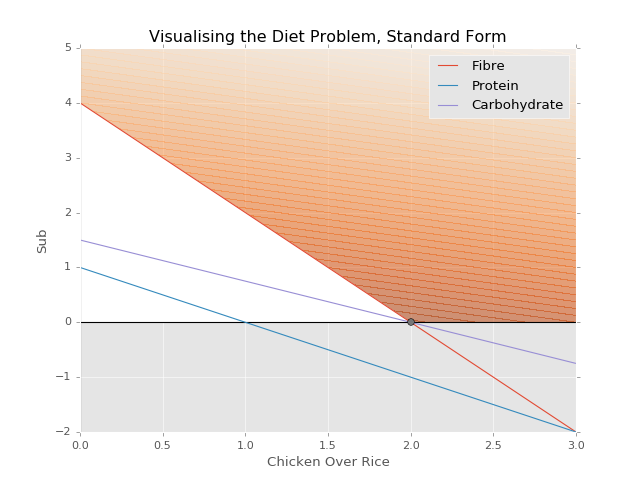

In [19]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# plot axes
axes.axhline(0, color='k')
axes.axvline(0, color='k')

# plot constraints
c_1 = lambda x: 4 - 2*x
c_2 = lambda x: 1 - x
c_3 = lambda x: - 0.25 * ( - 6 + 3*x )
c_1_line = axes.plot( r, c_1(r), label='Fibre' ) # 2r +  s \geq 4
c_2_line = axes.plot( r, c_2(r), label='Protein' ) # 3r + 3s \geq 3
c_3_line = axes.plot( r, c_3(r), label='Carbohydrate' ) # 3r + 4s \geq 6

# plot objective
s = numpy.linspace(s_min, s_max, res)
c = numpy.empty([r.size, s.size])
for i, r_i in enumerate(r):
    c[:,i] = - 5 * r_i - 12 * s

axes.contourf(r, s, c, res, cmap='Oranges', alpha=0.5)
r_cut = numpy.linspace(0.0, 2.0, 100)
axes.fill_between(r_cut, c_1(r_cut), color='w')

# plot cost minimising point
axes.plot(2.0, 0, 'o')

# label graph
axes.set_title('Visualising the Diet Problem, Standard Form')
axes.set_xlabel('Chicken Over Rice')
axes.set_ylabel('Sub')
axes.legend(loc=1)

plt.show()

In dual form, this is

\begin{align}
\text{minimise}   \quad & - 4y_1 - 3y_2 - 6y_3       \\
\text{subject to} \quad &   2y_1 + 3y_2 + 3y_3 = 5 \\
                        &    y_1 + 3y_2 + 4y_3 = 7 \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^3 \\
\end{align}

Which can be seen as minimising the objective function on the line segment  formed by intersecting the 2 constraint planes. We can also interpret this as wanting to **maximise** the nutritional value of our meals, given that trying to increase the quantity of one nutrient will necessarily mean that we have to give up some amount of another nutrient.

## The Simplex Method

### Standard Form (for the Simplex Method)


\begin{align}
\text{maximise}   \quad & c_1 x_1 + c_2 x_2 + \ldots + c_m x_m \\
\text{subject to} \quad & a_{11} x_1 + a_{12} x_2 + \ldots + a_{1m} x_m \leq b_1 \\
                        & a_{21} x_2 + a_{22} x_2 + \ldots + a_{2m} x_m \leq b_2 \\
                        & \vdots \\
                        & a_{n1} x_n + a_{n2} x_n + \ldots + a_{nm} x_m \leq b_n \\
\text{and}        \quad & \{ x_i \geq 0 \}_{i=1}^m \text{ and } \{ b_j \geq 0 \}_{j=1}^n
\end{align}

1. If you are currently trying to minimise the objective function, turn it into a maximisation problem by taking the negative of the expression
2. Turn all the inequality constraints into equality constraints by adding **slack variables**
3. If these transformation still don't allow your system of equations to fit the form, solve the **dual form** of the problem!

#### System of Constraint Equations

\begin{align}
\text{maximise}   \quad & c_1 x_1 + c_2 x_2 + \ldots + c_m x_m = z \\
\text{subject to} \quad & a_11 x_1 + a_12 x_2 + \ldots + a_1m x_m + s_1 = b_1 \\
                        & a_21 x_2 + a_22 x_2 + \ldots + a_2m x_m + s_2 =  b_2 \\
                        & \vdots \\
                        & a_n1 x_n + a_n2 x_n + \ldots + a_nm x_m + s_n =  b_n \\
\text{and}        \quad & \{ x_i \geq 0 \}_{i=1}^{m}, ~ \{ s_i \geq 0 \}_{j=1}^{n}, ~ \text{ and } \{ b_j \geq 0 \}_{j=1}^n
\end{align}

Taking another look at our diet problem, we can put this problem

\begin{align}
\text{maximise}   \quad & - 5r - 7s          \\
\text{subject to} \quad & - 2r -  s \leq - 4 \\
                        & - 3r - 3s \leq - 3 \\
                        & - 3r - 4s \leq - 6 \\
\text{and}        \quad & r, s \geq 0
\end{align}

into standard form for the simplex method by putting it into its dual form:

\begin{align}
\text{maximise}   \quad &   6y_1 + 3y_2 + 4y_3       \\
\text{subject to} \quad &   3y_1 + 3y_2 + 2y_3 \leq 5 \\
                        &   4y_1 + 3y_2 +  y_3 \leq 7 \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^3 \\
\end{align}

Hence, the constraint equations are

\begin{align}
\text{maximise}   \quad &   6y_1 + 3y_2 + 4y_3 = z      \\
\text{subject to} \quad &   3y_1 + 3y_2 + 2y_3 + s_1 = 5 \\
                        &   4y_1 + 3y_2 +  y_3 + s_2 = 7 \\
\text{and}        \quad & \{ y_i \geq 0 \}_{i=1}^3 \text{ and } \{ s_i \geq 0 \}_{i=1}^2 \\
\end{align}

### The Algorithm

In [20]:
import pandas as pd
pd.set_option('display.notebook_repr_html', True)

In [21]:
def pivot(departing, entering, tab):
    dpi = tab[tab['basic_variable']==departing].index[0] # index of the departing row
    
    # update basic variable
    tab['basic_variable'][dpi] = entering

    # normalise departing_row
    tab.ix[dpi,0:-1] = tab.ix[dpi,0:-1] / tab[entering][dpi]

    departing_row = tab.ix[dpi,0:-1]

    # do gauss-jordan on entering variable column
    for row in tab.index[tab.index!=dpi]:
        tab.ix[row, 0:-1] = tab.ix[row, 0:-1] - tab[entering][row] * departing_row

In [22]:
# Bland's rule
def calculate_ratio(entering, tab):
    ratios = tab.ix[0:-1, 'value'] * 0 - 1
    
    for index, is_valid in enumerate(tab.ix[0:-1, entering] > 0):
        if is_valid==True:
            ratios[index] = tab.ix[index, 'value']/tab.ix[index, entering]
    return ratios

In [23]:
def find_entering(tab):
    return tab.ix['z',0:-2].idxmin()

In [24]:
def find_departing(ratios, tab):
    return tab.ix[ratios[ratios>=0].idxmin(),'basic_variable']

In [25]:
def update_stats(tab):
        
    print "Basic variables: "
    basic_variables = tab.ix[0:-1, 'basic_variable'].values
    print basic_variables
    
    print "Non-basic variables: "
    non_basic_variables = numpy.setdiff1d(tab.columns[0:-2], basic_variables)
    print non_basic_variables
    
    print "Entering variable: "
    entering_variable = find_entering(tab)
    print entering_variable
    
    print "Ratios: "
    ratios = calculate_ratio(entering_variable, tab)
    print ratios
    
    print "Departing variable: "
    departing_variable = find_departing(ratios, tab)
    print departing_variable
    
    return departing_variable, entering_variable

In [26]:
def is_optimum(tab):
    return (tab.ix['z',0:-2] >= 0).all()

In [27]:
def run_simplex(tableau_dict, tableau_orig, max_iterations=10, force_iterations=0):
    if force_iterations == 0:
        for i in xrange(max_iterations):
            tableau_dict[i] = tableau_orig.copy()
            display(tableau_orig)
            if is_optimum(tableau_orig):
                break
            departing_variable, entering_variable = update_stats(tableau_orig)
            pivot(departing_variable, entering_variable, tableau_orig)
    else:
        for i in xrange(force_iterations):
            tableau_dict[i] = tableau_orig.copy()
            display(tableau_orig)
            departing_variable, entering_variable = update_stats(tableau_orig)
            pivot(departing_variable, entering_variable, tableau_orig)

In [28]:
c_1 = numpy.array([[ 3,  3,  2, 1, 0, 5, 's_1']])
c_2 = numpy.array([[ 4,  3,  1, 0, 1, 7, 's_2']])
z   = numpy.array([[-6, -3, -4, 0, 0, 0,    '']])
rows= numpy.concatenate((c_1, c_2, z), axis=0)

tableau = pd.DataFrame(rows, columns=['y_1','y_2','y_3','s_1','s_2','value', 'basic_variable'], index=['c_1','c_2','z']) 
tableau.ix[:,0:-1] = tableau.ix[:,0:-1].astype('float')

In [29]:
tableaux = dict()
run_simplex(tableaux, tableau)

,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,3,3,2,1,0,5,s_1
c_2,4,3,1,0,1,7,s_2
z,-6,-3,-4,0,0,0,


Basic variables: 
['s_1' 's_2']
Non-basic variables: 
['y_1' 'y_2' 'y_3']
Entering variable: 
y_1
Ratios: 
c_1    1.66667
c_2       1.75
Name: value, dtype: object
Departing variable: 
s_1


,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,1,1,0.666667,0.333333,0,1.66667,y_1
c_2,0,-1,-1.66667,-1.33333,1,0.333333,s_2
z,0,3,0,2,0,10,


In [30]:
from ipywidgets import interact

def diet_problem(step):
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)

    # plot axes
    axes.axhline(0, color='k')
    axes.axvline(0, color='k')

    # plot constraints
    c_1 = lambda x: 4 - 2*x
    c_2 = lambda x: 1 - x
    c_3 = lambda x: - 0.25 * ( - 6 + 3*x )
    c_1_line = axes.plot( r, c_1(r), label='Fibre' ) # 2r +  s \geq 4
    c_2_line = axes.plot( r, c_2(r), label='Protein' ) # 3r + 3s \geq 3
    c_3_line = axes.plot( r, c_3(r), label='Carbohydrate' ) # 3r + 4s \geq 6

    # plot objective
    for i, r_i in enumerate(r):
        c[:,i] = - 5 * r_i - 12 * s

    axes.contourf(r, s, c, res, cmap='Oranges', alpha=0.5)
    axes.fill_between(r_cut, c_1(r_cut), color='w')

    step_coords = numpy.array([[0.0, 0.0], [2.0, 0.0]])
    
    # plot point
    axes.plot(step_coords[step][0], step_coords[step][1], 'ro', markersize=10)

    # label graph
    axes.set_title('Simplex Method on the College Diet Problem, Iteration ' + str(step))
    axes.set_xlabel('Chicken Over Rice')
    axes.set_ylabel('Sub')
    axes.legend(loc=1)

    plt.show()
    display(tableaux[step])

<IPython.core.display.Javascript object>


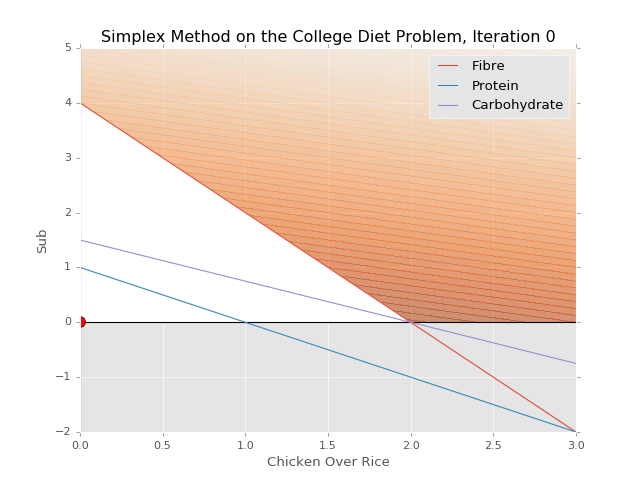

,y_1,y_2,y_3,s_1,s_2,value,basic_variable
c_1,3,3,2,1,0,5,s_1
c_2,4,3,1,0,1,7,s_2
z,-6,-3,-4,0,0,0,


In [31]:
interact(diet_problem, step=(0,1));

### Bland's Rule

This seemingly arbitrary rule will seem less arbitrary in just a while.

### Multiple Optimal Solutions

So, given the graphical intuition we now have for how the simplex method works, do we know if there ever a time when we would encounter more than 1 optimal solution for a given problem?

\begin{align}
\text{maximise}   \quad &  5x_1 +  7x_2          \\
\text{subject to} \quad &  2x_1 +   x_2 \leq 4 \\
                        & 10x_1 + 14x_2 \leq 30 \\
\text{and}        \quad & x_1, x_2 \geq 0
\end{align}

<IPython.core.display.Javascript object>


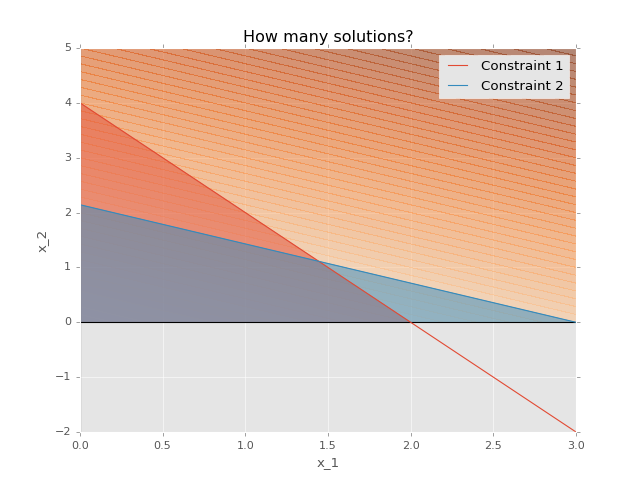

In [33]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# define view
x_1_min = 0.0
x_1_max = 3.0
x_2_min = 0.0
x_2_max = 5.0
res = 50

# plot axes
axes.axhline(0, color='k')
axes.axvline(0, color='k')

# plot constraints
x_1 = numpy.linspace(x_1_min, x_1_max, res)
c_1 = lambda x: 4.0 - 2.0*x
c_2 = lambda x: (30.0 - 10.0*x)/14.0
c_1_line = axes.plot( x_1, c_1(x_1), label='Constraint 1' ) # 2x_1 +   x_2 \leq 4
c_2_line = axes.plot( x_1, c_2(x_1), label='Constraint 2' ) # 10x_1 + 14x_2 \leq 30

# plot objective
x_2 = numpy.linspace(x_2_min, x_2_max, res)
c = numpy.empty([x_1.size, x_2.size])
for i, x_1_i in enumerate(x_1):
    c[:,i] = 5 * x_1_i + 7 * x_2

axes.contourf(x_1, x_2, c, res, cmap='Oranges', alpha=0.5)
# shade feasible region
c_1_bottom = numpy.linspace(0.0, 2.0, res)
c_2_bottom = numpy.linspace(0.0, 3.0, res)
axes.fill_between(c_1_bottom, c_1(c_1_bottom), color=plt.rcParams['axes.color_cycle'][0], alpha=0.5)
axes.fill_between(c_2_bottom, c_2(c_2_bottom), color=plt.rcParams['axes.color_cycle'][1], alpha=0.5)

# label graph
axes.set_title('How many solutions?')
axes.set_xlabel(r'x_1')
axes.set_ylabel(r'x_2')
axes.legend(loc=1)

plt.show()

\begin{align}
\text{maximise}   \quad &  5x_1 +  7x_2          \\
\text{subject to} \quad &  2x_1 +   x_2 + s_1 = 4 \\
                        & 10x_1 + 14x_2 + s_2 = 30 \\
\text{and}        \quad & x_1, x_2, s_1, s_2 \geq 0
\end{align}

In [34]:
c_1 = numpy.array([[ 2,  1, 1, 0,  4, 's_1']])
c_2 = numpy.array([[10, 14, 0, 1, 30, 's_2']])
z   = numpy.array([[-5, -7, 0, 0,  0,    '']])
rows= numpy.concatenate((c_1, c_2, z), axis=0)

tableau_multiple = pd.DataFrame(rows, columns=['x_1','x_2','s_1','s_2','value', 'basic_variable'], index=['c_1','c_2','z']) 
tableau_multiple.ix[:,0:-1] = tableau_multiple.ix[:,0:-1].astype('float')

In [35]:
tableaux_multiple = dict()
run_simplex(tableaux_multiple, tableau_multiple, force_iterations=3)

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,2,1,1,0,4,s_1
c_2,10,14,0,1,30,s_2
z,-5,-7,0,0,0,


Basic variables: 
['s_1' 's_2']
Non-basic variables: 
['x_1' 'x_2']
Entering variable: 
x_2
Ratios: 
c_1          4
c_2    2.14286
Name: value, dtype: object
Departing variable: 
s_2


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,1.28571,0,1,-0.0714286,1.85714,s_1
c_2,0.714286,1,0,0.0714286,2.14286,x_2
z,0,0,0,0.5,15,


Basic variables: 
['s_1' 'x_2']
Non-basic variables: 
['s_2' 'x_1']
Entering variable: 
x_1
Ratios: 
c_1    1.44444
c_2          3
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,1,0,0.777778,-0.0555556,1.44444,x_1
c_2,0,1,-0.555556,0.111111,1.11111,x_2
z,0,0,0,0.5,15,


Basic variables: 
['x_1' 'x_2']
Non-basic variables: 
['s_1' 's_2']
Entering variable: 
x_1
Ratios: 
c_1    1.44444
c_2         -1
Name: value, dtype: object
Departing variable: 
x_1


In [45]:
step_coords = numpy.array([[0.0, 0.0], [0.0, 2.14286], [tableaux_multiple[2].ix['c_1','value'], tableaux_multiple[2].ix['c_2','value']]])
step_value = numpy.array([tableaux_multiple[0].ix['z','value'], tableaux_multiple[1].ix['z','value'], tableaux_multiple[2].ix['z','value']])

def multiple_problem(step):
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)

    # define view
    x_1_min = 0.0
    x_1_max = 3.0
    x_2_min = 0.0
    x_2_max = 5.0

    # plot axes
    axes.axhline(0, color='k')
    axes.axvline(0, color='k')

    # plot constraints
    x_1 = numpy.linspace(x_1_min, x_1_max, res)
    c_1 = lambda x: 4.0 - 2.0*x
    c_2 = lambda x: (30.0 - 10.0*x)/14.0
    c_1_line = axes.plot( r, c_1(r), label='Constraint 1' ) # 2x_1 +   x_2 \leq 4
    c_2_line = axes.plot( r, c_2(r), label='Constraint 2' ) # 10x_1 + 14x_2 \leq 30

    # plot objective
    x_2 = numpy.linspace(x_2_min, x_2_max, res)
    c = numpy.empty([x_1.size, x_2.size])
    for i, x_1_i in enumerate(x_1):
        c[:,i] = 5 * x_1_i + 7 * x_2

    # color map of objective function values
    axes.contourf(x_1, x_2, c, res, cmap='Oranges', alpha=0.5)
    
    # shade feasible region
    c_1_bottom = numpy.linspace(0.0, 2.0, res)
    c_2_bottom = numpy.linspace(0.0, 3.0, res)
    axes.fill_between(c_1_bottom, c_1(c_1_bottom), color=plt.rcParams['axes.color_cycle'][0], alpha=0.5)
    axes.fill_between(c_2_bottom, c_2(c_2_bottom), color=plt.rcParams['axes.color_cycle'][1], alpha=0.5)
        
    # plot point
    axes.plot(step_coords[step][0], step_coords[step][1], 'ro', markersize=10)
    axes.text(step_coords[step][0]+0.1, step_coords[step][1], step_value[step])
    
    # label graph
    axes.set_title('How many solutions?')
    axes.set_xlabel('x_1')
    axes.set_ylabel('x_2')
    axes.legend(loc=1)

    plt.show()
    display(tableaux_multiple[step])

<IPython.core.display.Javascript object>


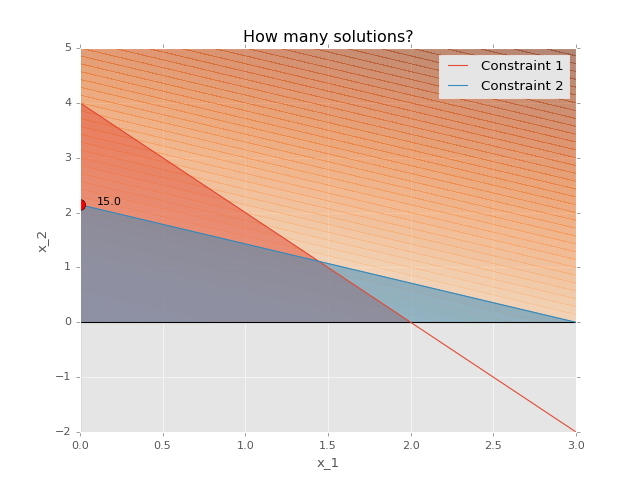

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,1.28571,0,1,-0.0714286,1.85714,s_1
c_2,0.714286,1,0,0.0714286,2.14286,x_2
z,0,0,0,0.5,15,


In [46]:
interact(multiple_problem, step=(0,2));

### Unbounded Optima

\begin{align}
\text{maximise}   \quad &  5x_1 +  7x_2          \\
\text{subject to} \quad &  -x_1 +   x_2 \leq 5 \\
                        & -\frac{1}{2}x_1 + x_2 \leq 7 \\
\text{and}        \quad & x_1, x_2 \geq 0
\end{align}

<IPython.core.display.Javascript object>


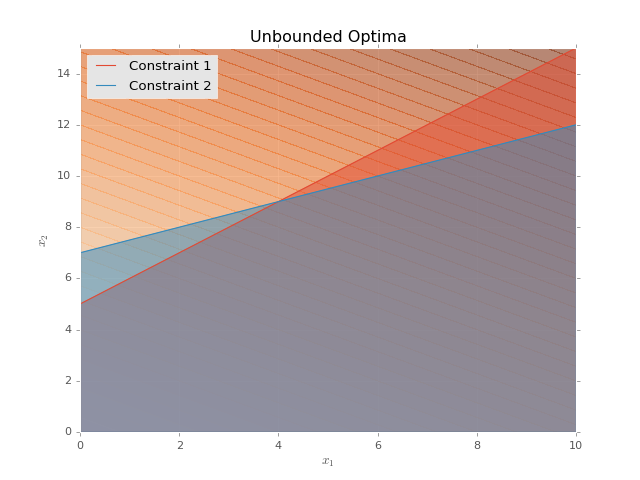

In [39]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# define view
x_1_min = 0.0
x_1_max = 10.0
x_2_min = 0.0
x_2_max = 15.0
# res = 100

# plot axes
axes.axhline(0, color='k')
axes.axvline(0, color='k')

# plot constraints
x_1 = numpy.linspace(x_1_min, x_1_max, res)
c_1 = lambda x: 5.0 + x
c_2 = lambda x: 7 + 0.5*x
c_1_line = axes.plot( x_1, c_1(x_1), label='Constraint 1' ) # -x_1 +   x_2 \leq 5
c_2_line = axes.plot( x_1, c_2(x_1), label='Constraint 2' ) # -\frac{1}{2}x_1 + x_2 \leq 7

# plot objective
x_2 = numpy.linspace(x_2_min, x_2_max, res)
c = numpy.empty([x_1.size, x_2.size])
for i, x_1_i in enumerate(x_1):
    c[:,i] = 5 * x_1_i + 7 * x_2

axes.contourf(x_1, x_2, c, res, cmap='Oranges', alpha=0.5)
# shade feasible region
# c_1_bottom = numpy.linspace(0.0, 2.0, res)
# c_2_bottom = numpy.linspace(0.0, 3.0, res)
axes.fill_between(x_1, c_1(x_1), color=plt.rcParams['axes.color_cycle'][0], alpha=0.5)
axes.fill_between(x_1, c_2(x_1), color=plt.rcParams['axes.color_cycle'][1], alpha=0.5)

# label graph
axes.set_title('Unbounded Optima')
axes.set_xlabel(r'$x_1$')
axes.set_ylabel(r'$x_2$')
axes.legend(loc=2)

plt.show()

\begin{align}
\text{maximise}   \quad &  5x_1 +  7x_2          \\
\text{subject to} \quad &  -x_1 +   x_2 + s_1 = 5 \\
                        & -\frac{1}{2}x_1 + x_2 + s_2 = 7 \\
\text{and}        \quad & x_1, x_2, s_1, s_2 \geq 0
\end{align}

In [43]:
c_1 = numpy.array([[  -1,  1, 1, 0,  5, 's_1']])
c_2 = numpy.array([[-0.5,  1, 0, 1,  7, 's_2']])
z   = numpy.array([[  -5, -7, 0, 0,  0,    '']])
rows= numpy.concatenate((c_1, c_2, z), axis=0)

tableau_unbounded = pd.DataFrame(rows, columns=['x_1','x_2','s_1','s_2','value', 'basic_variable'], index=['c_1','c_2','z']) 
tableau_unbounded.ix[:,0:-1] = tableau_unbounded.ix[:,0:-1].astype('float')

In [44]:
tableaux_unbounded = dict()
run_simplex(tableaux_unbounded, tableau_unbounded)

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,-1,1,1,0,5,s_1
c_2,-0.5,1,0,1,7,s_2
z,-5,-7,0,0,0,


Basic variables: 
['s_1' 's_2']
Non-basic variables: 
['x_1' 'x_2']
Entering variable: 
x_2
Ratios: 
c_1    5
c_2    7
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,-1,1,1,0,5,x_2
c_2,0.5,0,-1,1,2,s_2
z,-12,0,7,0,35,


Basic variables: 
['x_2' 's_2']
Non-basic variables: 
['s_1' 'x_1']
Entering variable: 
x_1
Ratios: 
c_1   -1
c_2    4
Name: value, dtype: object
Departing variable: 
s_2


,x_1,x_2,s_1,s_2,value,basic_variable
c_1,0,1,-1,2,9,x_2
c_2,1,0,-2,2,4,x_1
z,0,0,-17,24,83,


Basic variables: 
['x_2' 'x_1']
Non-basic variables: 
['s_1' 's_2']
Entering variable: 
s_1
Ratios: 
c_1   -1
c_2   -1
Name: value, dtype: object
Departing variable: 


ValueError: attempt to get argmin of an empty sequence

We got an error!

`ValueError: attempt to get argmin of an empty sequence`

Usually, errors are bad things, but in this case, the error is trying to tell us something

In the code:

`return tab.ix[ratios[ratios>=0].idxmin(),'basic_variable']`

Which is telling us that no non-negative ratio was found! Why is this a problem for us? Let's take a look at the equations our tableau, and our equations at this point in time:

In [45]:
display(tableau_unbounded)

,x_1,x_2,s_1,s_2,value,basic_variable
c_1,0,1,-1,2,9,x_2
c_2,1,0,-2,2,4,x_1
z,0,0,-17,24,83,


\begin{gather}
  z = 83 + 17 s_1 - 24 s_2 \\
x_1 = 4 + 2 s_1 - 2 s_2 \\
x_2 = 9 + s_1 - 2 s_2
\end{gather}

At this point, we want to pick $s_1$ as our entering variable because it is has most negative coefficient, and increasing the value of $s_1$ would most increase the value of $z$.

Usually, increasing the value of $s_1$ would also mean that we have to decrease the value of one of the basic variables to 0 (so that we stay within our feasible region).

Here, what we have is that **increasing the value of $s_1$ would also increase the value of both our basic variables**, which means that our objective function will be able to increase without bound.

So the simplex method is able to tell us when our problem is unbounded, by virtue of the fact that the negative coefficient in the tableau indicates that we have not attained the optimum, but we are also unable to find a positive ratio to choose our departing variable.

### Degeneracy and Cycling

Disclaimer: this example was stolen from [here](http://mat.gsia.cmu.edu/classes/QUANT/NOTES/chap7.pdf).

\begin{align}
\text{maximise}   \quad &  2x_1 +  7x_2         \\
\text{subject to} \quad &  -x_1 +   x_2 \leq 3  \\
                        &   x_1 -   x_2 \leq 3 \\
                        &           x_2 \leq 2  \\
\text{and}        \quad & x_1, x_2 \geq 0
\end{align}

<IPython.core.display.Javascript object>


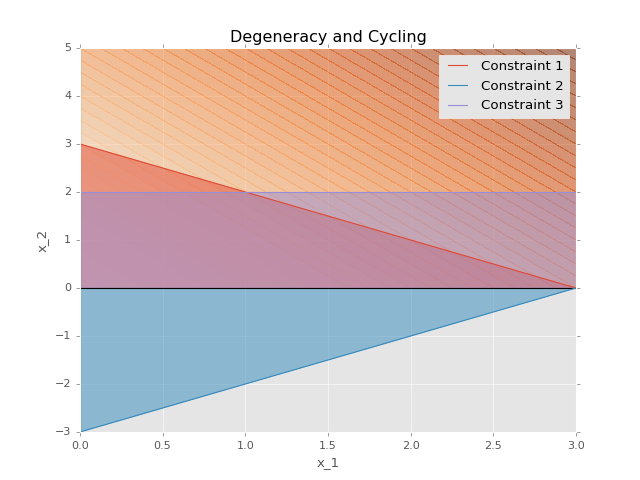

In [46]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# define view
x_1_min = 0.0
x_1_max = 3.0
x_2_min = 0.0
x_2_max = 5.0
# res = 100

# plot axes
axes.axhline(0, color='k')
axes.axvline(0, color='k')

# plot constraints
x_1 = numpy.linspace(x_1_min, x_1_max, res)
c_1 = lambda x: 3.0 - x
c_2 = lambda x: -3.0 + x
c_3 = lambda x: 2.0 * numpy.ones(x.size)
c_1_line = axes.plot( x_1, c_1(x_1), label='Constraint 1' ) # 2x_1 +   x_2 \leq 4
c_2_line = axes.plot( x_1, c_2(x_1), label='Constraint 2' ) # 10x_1 + 14x_2 \leq 30
c_3_line = axes.plot( x_1, c_3(x_1), label='Constraint 3' ) # -2x_1 +  x_2  \leq 0

# plot objective
x_2 = numpy.linspace(x_2_min, x_2_max, res)
c = numpy.empty([x_1.size, x_2.size])
for i, x_1_i in enumerate(x_1):
    c[:,i] = 2.0 * x_1_i + x_2

axes.contourf(x_1, x_2, c, res, cmap='Oranges', alpha=0.5)
# shade feasible region
c_1_bottom = numpy.linspace(0.0, 3.0, res)
c_2_bottom = numpy.linspace(0.0, 3.0, res)
c_3_bottom = numpy.linspace(0.0, 3.0, res)
axes.fill_between(c_1_bottom, c_1(c_1_bottom), color=plt.rcParams['axes.color_cycle'][0], alpha=0.5)
axes.fill_between(c_2_bottom, c_2(c_2_bottom), color=plt.rcParams['axes.color_cycle'][1], alpha=0.5)
axes.fill_between(c_3_bottom, c_3(c_3_bottom), color=plt.rcParams['axes.color_cycle'][2], alpha=0.5)

# label graph
axes.set_title('Degeneracy and Cycling')
axes.set_xlabel(r'x_1')
axes.set_ylabel(r'x_2')
axes.legend(loc=1)

plt.show()

\begin{align}
\text{maximise}   \quad &  2x_1 +  7x_2          \\
\text{subject to} \quad &  -x_1 +   x_2 + s_1 = 3 \\
                        &   x_1 -   x_2 + s_2 = 3 \\
                        &           x_2 + s_3 = 2 \\
\text{and}        \quad & \{x_i\}_{i=1}^2, \{s_j\}_{j=1}^3 \geq 0
\end{align}

In [49]:
c_1 = numpy.array([[ 3,  1, 1, 0, 0,  6, 's_1']])
c_2 = numpy.array([[ 1, -1, 0, 1, 0,  2, 's_2']])
c_3 = numpy.array([[ 0,  1, 0, 0, 1,  3, 's_3']])
z   = numpy.array([[-2, -1, 0, 0, 0,  0,    '']])
rows= numpy.concatenate((c_1, c_2, c_3, z), axis=0)

tableau_degenerate = pd.DataFrame(rows, columns=['x_1','x_2','s_1','s_2','s_3','value', 'basic_variable'], index=['c_1','c_2','c_3','z']) 
tableau_degenerate.ix[:,0:-1] = tableau_degenerate.ix[:,0:-1].astype('float')

In [50]:
tableaux_degenerate = dict()
run_simplex(tableaux_degenerate, tableau_degenerate)

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,3,1,1,0,0,6,s_1
c_2,1,-1,0,1,0,2,s_2
c_3,0,1,0,0,1,3,s_3
z,-2,-1,0,0,0,0,


Basic variables: 
['s_1' 's_2' 's_3']
Non-basic variables: 
['x_1' 'x_2']
Entering variable: 
x_1
Ratios: 
c_1    2
c_2    2
c_3   -1
Name: value, dtype: object
Departing variable: 
s_1


,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


Basic variables: 
['x_1' 's_2' 's_3']
Non-basic variables: 
['s_1' 'x_2']
Entering variable: 
x_2
Ratios: 
c_1    6
c_2   -1
c_3    3
Name: value, dtype: object
Departing variable: 
s_3


,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0.333333,0,-0.333333,1,x_1
c_2,0,0,-0.333333,1,1.33333,4,s_2
c_3,0,1,0,0,1,3,x_2
z,0,0,0.666667,0,0.333333,5,


In [51]:
step_coords = numpy.transpose([numpy.zeros(len(tableaux_degenerate)), 2.0*numpy.ones(len(tableaux_degenerate))])
step_coords[0][1] = 0.0

def degeneracy_plot(step):
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)

    # define view
    x_1_min = 0.0
    x_1_max = 3.0
    x_2_min = 0.0
    x_2_max = 5.0
#     res = 100

    # plot axes
    axes.axhline(0, color='k')
    axes.axvline(0, color='k')

    # plot constraints
    x_1 = numpy.linspace(x_1_min, x_1_max, res)
    c_1 = lambda x: 3.0 - x
    c_2 = lambda x: -3.0 + x
    c_3 = lambda x: 2.0 * numpy.ones(x.size)
    c_1_line = axes.plot( x_1, c_1(x_1), label='Constraint 1' ) # 2x_1 +   x_2 \leq 4
    c_2_line = axes.plot( x_1, c_2(x_1), label='Constraint 2' ) # 10x_1 + 14x_2 \leq 30
    c_3_line = axes.plot( x_1, c_3(x_1), label='Constraint 3' ) # -2x_1 +  x_2  \leq 0

    # plot objective
    x_2 = numpy.linspace(x_2_min, x_2_max, res)
    c = numpy.empty([x_1.size, x_2.size])
    for i, x_1_i in enumerate(x_1):
        c[:,i] = 2.0 * x_1_i + x_2

    axes.contourf(x_1, x_2, c, res, cmap='Oranges', alpha=0.5)
    # shade feasible region
    c_1_bottom = numpy.linspace(0.0, 3.0, res)
    c_2_bottom = numpy.linspace(0.0, 3.0, res)
    c_3_bottom = numpy.linspace(0.0, 3.0, res)
    axes.fill_between(c_1_bottom, c_1(c_1_bottom), color=plt.rcParams['axes.color_cycle'][0], alpha=0.5)
    axes.fill_between(c_2_bottom, c_2(c_2_bottom), color=plt.rcParams['axes.color_cycle'][1], alpha=0.5)
    axes.fill_between(c_3_bottom, c_3(c_3_bottom), color=plt.rcParams['axes.color_cycle'][2], alpha=0.5)

    # plot point
    axes.plot(step_coords[step][0], step_coords[step][1], 'ro', markersize=10)
    
    # label graph
    axes.set_title('Degeneracy and Cycling, Iteration ' + str(step))
    axes.set_xlabel(r'x_1')
    axes.set_ylabel(r'x_2')
    axes.legend(loc=1)

    plt.show()
    display(tableaux_degenerate[step])

<IPython.core.display.Javascript object>


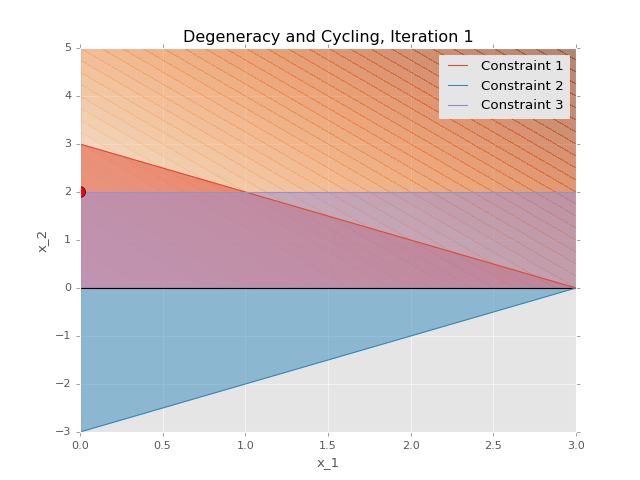

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


In [52]:
interact(degeneracy_plot, step=(0,len(tableaux_degenerate)-1))

> You think you're moving, but you get nowhere. — _Stop and Stare_, OneRepublic

As its name suggests, degeneracy is when you get a basic variable (that's supposed to have a non-zero value) with a value of 0, and you are able to modify the value of the objective function without moving on the simplex.

In general, predicting when degeneracy will occur is non-trivial; one [source](http://theory.stanford.edu/~megiddo/pdf/degen.pdf) claims that it is NP-complete. You can read more about it [here](http://www.amazon.com/Degeneracy-Simplex-Cycling-Economics-Mathematical/dp/354054593X).

#### Bland's Rule

* Choose the non-basic variable with the most negative coefficient as the entering variable
* Choose the basic variable producing the smallest value/pivot ratio as the departing variable

Using Bland's Rule, the Simplex Method will never cycle if it encounters degeneracy (i.e. it halts on all inputs)

#### So what is cycling?

In [51]:
tableaux_degenerate[1]

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0.333333,0.333333,0,0,2,x_1
c_2,0,-1.33333,-0.333333,1,0,0,s_2
c_3,0,1,0,0,1,3,s_3
z,0,-0.333333,0.666667,0,0,4,


Without Bland's Rule, one could potentially choose to pivot on $s_2$, which will give us

In [52]:
pivot('s_2', 'x_2', tableaux_degenerate[1])
tableaux_degenerate[1]

,x_1,x_2,s_1,s_2,s_3,value,basic_variable
c_1,1,0,0.25,0.25,0,2,x_1
c_2,-0,1,0.25,-0.75,-0,-0,x_2
c_3,0,0,-0.25,0.75,1,3,s_3
z,0,0,0.75,-0.25,0,4,


Choosing $x_2$ to pivot back to seems like a good idea, right? Nope.

In [ ]:
pivot('x_2', 's_2', tableaux_degenerate[1])
tableaux_degenerate[1]

Cycling, ladies and gentlemen, aka a slow spiral into insanity.

##### $\epsilon-$perturbations

Another earlier (and nowadays less popular) method for avoiding degeneracy is by introducing $\epsilon$-perturbations into the problem. Recall that the standard system goes like

\begin{align}
\text{maximise}   \quad & c^T x \\
\text{subject to} \quad & Ax = b \\
\text{and}        \quad & x \geq 0
\end{align}

With $\epsilon$-perturbations, we will instead solve

\begin{align}
\text{maximise}   \quad & c^T x \\
\text{subject to} \quad & Ax = b + \epsilon \\
\text{and}        \quad & x \geq 0
\end{align}

which will give us a close enough answer to the original problem, and help us avoid the problem with the 0's. This kind of happens automatically as a bonus if you're running the simplex algorithm on a computer; as the program runs, errors from truncation, etc. build up, and you eventually get out of the cycle because your computer is doing floating point arithmetic.

Which is just about the one good thing about floating point arithmetic, I guess.

### Time Complexity of the Simplex Method
#### The Klee-Minty Cube

\begin{align}
\text{maximise}   \quad &  100x_1 +  10x_2 + x_3          \\
\text{subject to} \quad &     x_1                \leq 1   \\
                        &   20x_1 +    x_2       \leq 100 \\
                        &  200x_1 +  20x_2 + x_3 \leq 10000\\
\text{and}        \quad & x_1, x_2, x_3 \geq 0
\end{align}

In [ ]:
c_1 = numpy.array([[   1.0,   0.0,  0.0, 1.0, 0.0, 0.0,     1.0, 's_1']])
c_2 = numpy.array([[  20.0,   1.0,  0.0, 0.0, 1.0, 0.0,   100.0, 's_2']])
c_3 = numpy.array([[ 200.0,  20.0,  1.0, 0.0, 0.0, 1.0, 10000.0, 's_3']])
z   = numpy.array([[-100.0, -10.0, -1.0, 0.0, 0.0, 0.0,     0.0,    '']])
rows= numpy.concatenate((c_1, c_2, c_3, z), axis=0)

tableau_klee_minty = pd.DataFrame(rows, columns=['x_1','x_2', 'x_3','s_1','s_2','s_3','value', 'basic_variable'], index=['c_1','c_2','c_3','z']) 
tableau_klee_minty.ix[:,0:-1] = tableau_klee_minty.ix[:,0:-1].astype('float')

In [ ]:
tableaux_klee_minty = dict()
run_simplex(tableaux_klee_minty, tableau_klee_minty)

Notice that our ending basic variables are $s_1$, $s_2$, and $x_3$, which means that if we had chosen $x_3$ to enter instead of $x_1$, we could have been done in one step! The greedy algoritm of the simplex method backfires on us here, since choosing the non-basic variable with the **least negative** coefficient would have gotten us to our solution much faster!

Instead, using the simplex method, we are forced to visit all 8 corners of the constraint cube in our quest to find the optimum.

#### Defeating the Klee-Minty Cube

The Klee-Minty Cube is the de-facto standard nowadays for determining how well a linear programming algorithm would perform. Algorithms like the Simplex Method and the Criss-Cross algorithm have exponential worst-case time complexities.

Other methods that choose pivots randomly have been shown to have polynomial worst-case time bounds, but perform worst than the Simplex method on average.

## Open Problems in Linear Programming

1. Integer solutions?
2. "Strongly polynomial" solutions

## References

George B. Dantzig, Mukund N. Thapa _Linear Programming 1- Introduction_ (Springer Series in Operations Research and Financial Engineering)
http://mat.gsia.cmu.edu/classes/QUANT/NOTES/chap7.pdf
http://college.cengage.com/mathematics/larson/elementary_linear/4e/shared/downloads/c09s3.pdf
http://college.cengage.com/mathematics/larson/elementary_linear/4e/shared/downloads/c09s4.pdf
http://www.iip.ist.i.kyoto-u.ac.jp/member/cuturi/Teaching/ORF522/lec8v2.pdf
http://math.stackexchange.com/questions/82006/in-simplex-method-if-the-leaving-variable-fails-for-all-candidates-of-mrt-what
https://www.math.unl.edu/~sdunbar1/ProbabilityTheory/Lessons/Applications/LinearOptimization/linearoptimization.pdf